<a href="https://colab.research.google.com/github/AExzxt/IA/blob/main/Actividades/A5_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5. Procesamiento de conjuntos de datos en Python**

In [ ]:
# IMC	2003759	Nicolás Israel García Aldana
# IMC	2177765	Aldrin Emmanuel Naranjo Hernández
# IMC	2063766	Alan Javier Peña Puente
# IMC	2065133	Brian Alexis Medrano Franco
# IMC	1992270	Iván Alejandro Alvarado Segovia

1. Cargar librerías y datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/9df5a5c93be47777b05ffc5cdaffcb2262d10013/MachineLearning/Datasets/robot_sensors.csv"
# Cargar datos desde un archivo CSV
df = pd.read_csv(url)

2. Mostrar primeras filas del dataset

In [ ]:
print(df.head())

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246


3. Limpiar los datos

a. Eliminar filas que contienen datos faltantes

In [ ]:
# Eliminar filas que contienen datos faltantes
df = df.dropna().copy()

# Verificar que no hay valores nulos restantes
print("Valores nulos totales después de eliminar filas con datos faltantes:", df.isnull().sum().sum())

Valores nulos totales después de eliminar filas con datos faltantes: 0


b. Filtrar valores atípicos

In [ ]:
# Valores negativos en 'Velocidad (cm/s)' y reemplazados con la media
mean_velocity = df['Velocidad (cm/s)'].mean()
df.loc[df['Velocidad (cm/s)'] < 0, 'Velocidad (cm/s)'] = mean_velocity

# Valores negativos en 'Distancia (cm)' y reemplazados con la media
mean_distance = df['Distancia (cm)'].mean()
df.loc[df['Distancia (cm)'] < 0, 'Distancia (cm)'] = mean_distance

print("DataFrame después de filtrar valores atípicos (velocidad y distancia negativas):")
print(df.head())

DataFrame después de filtrar valores atípicos (velocidad y distancia negativas):
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246


4. Normalizar los datos numéricos con Min-Max Scaling

In [ ]:
# Seleccionar las columnas numéricas (excluyendo 'Tiempo (s)')
numeric_cols = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Normalizar con Min-Max Scaling
for col in numeric_cols:
    min_val = np.min(df[col])
    max_val = np.max(df[col])
    df[col] = (df[col] - min_val) / (max_val - min_val)

print("DataFrame después de normalizar los datos:")
print(df.head())

DataFrame después de normalizar los datos:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0        0.371735          0.182609          0.262269
1           1        0.950755          0.540740          0.247509
2           2        0.730954          0.873049          0.908233
3           3        0.596960          0.731791          0.250082
4           4        0.152134          0.806411          0.272535


5. Visualizar los datos normalizados usando matplotlib

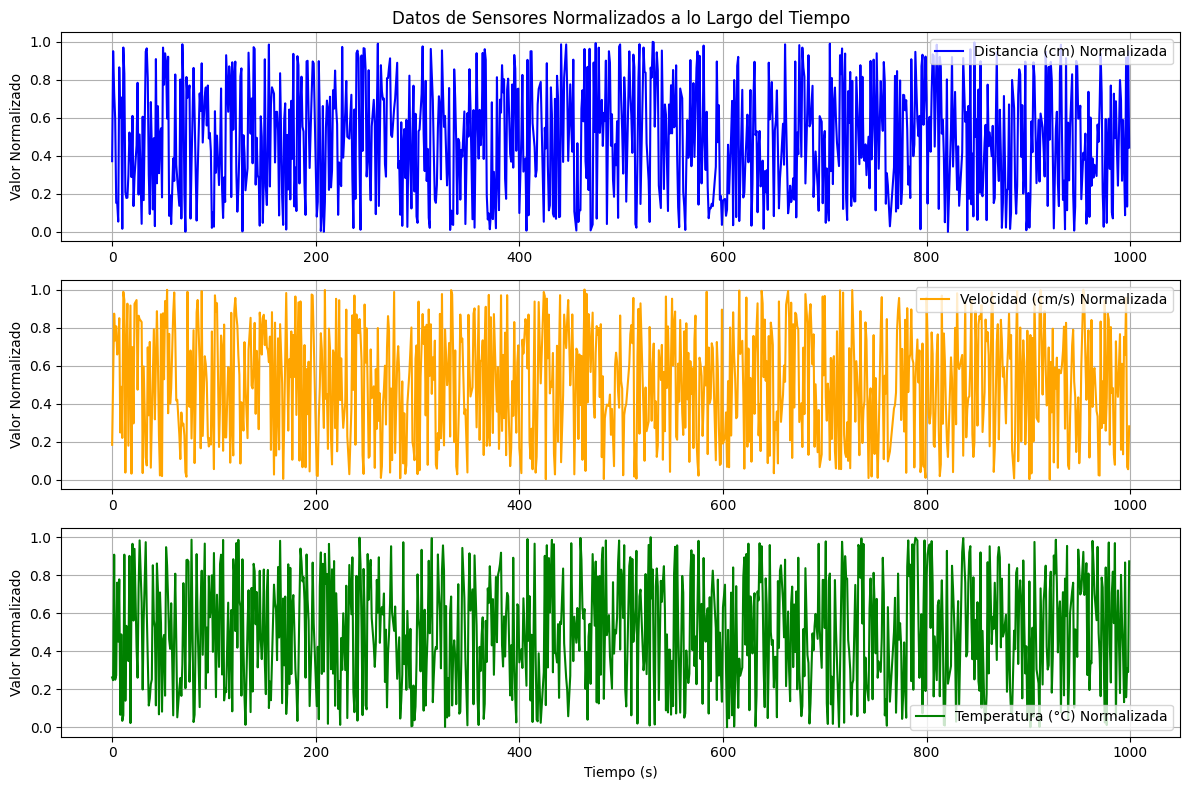

In [ ]:
# Visualizar los datos normalizados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Tiempo (s)'], df['Distancia (cm)'], label='Distancia (cm) Normalizada', color='blue')
plt.ylabel('Valor Normalizado')
plt.title('Datos de Sensores Normalizados a lo Largo del Tiempo')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df['Tiempo (s)'], df['Velocidad (cm/s)'], label='Velocidad (cm/s) Normalizada', color='orange')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df['Tiempo (s)'], df['Temperatura (°C)'], label='Temperatura (°C) Normalizada', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()